# IMPORTING REQUIRED LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
import shap

# LOADING DATASET

In [4]:
df_train=pd.read_csv('train.csv')
print(df_train.shape)
df_train.head()

(165034, 14)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [5]:
df_test=pd.read_csv('test.csv')
print(df_test.shape)
df_train.head()

(110023, 13)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# UNDERSTANDING OF DATA

## 1. Checking the Dimensions of Dataset

In [5]:
print("Total number of records/rows present in the dataset is:",df_train.shape[0])
print("Total number of attributes/columns present in the dataset is:",df_train.shape[1])

Total number of records/rows present in the dataset is: 165034
Total number of attributes/columns present in the dataset is: 14


## 2. Generating Basic Information of the Data

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [8]:
df_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
df_test.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


## 3. Computing Total Number of Missing Values

In [10]:
df_train.isnull().sum().to_frame().rename(columns={0:"Total Number of Missing Values (train)"})

,Total Number of Missing Values (train)
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
df_test.isnull().sum().to_frame().rename(columns={0:"Total Number of Missing Values (test)"})

,Total Number of Missing Values (test)
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


## 4. Checking Duplicate Records

In [12]:
df_train[df_train.duplicated()]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# DATA CLEANING

In [100]:
df_train.drop(columns=['CustomerId'],inplace=True)

In [101]:
df_train.drop(columns=['Surname'],inplace=True)

In [102]:
df_test.drop(columns=['CustomerId'],inplace=True)

In [103]:
df_test.drop(columns=['Surname'],inplace=True)

# EDA (EXPLORATORY DATA ANALYSIS)

## 1. Visualizing Target Variable

In [17]:
df_train.groupby('Exited')['id'].count()

Exited
0    130113
1     34921
Name: id, dtype: int64

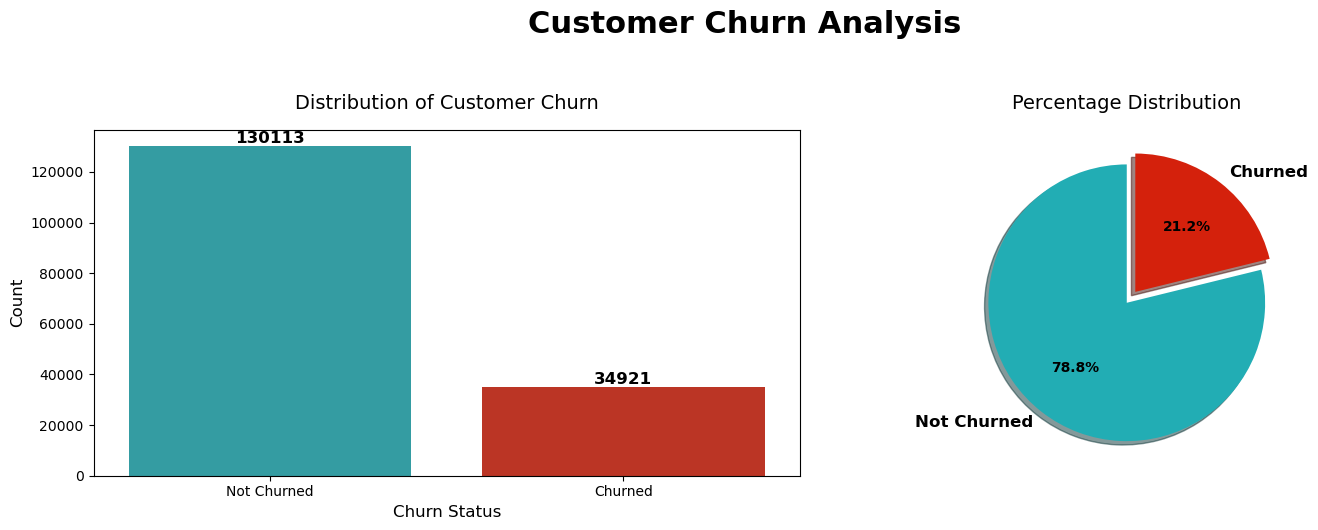

In [33]:
count = df_train["Exited"].value_counts()
labels = ['Not Churned', 'Churned']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Customer Churn Analysis', fontsize=22, fontweight='bold', y=1.05)

sns.countplot(data=df_train, x="Exited", hue="Exited", ax=ax1, palette=["#22adb4", "#d4210c"], legend=False)

for container in ax1.containers:
    ax1.bar_label(container, fontsize=12, fontweight='bold')
ax1.set_title("Distribution of Customer Churn", fontsize=14, pad=15)
ax1.set_xlabel("Churn Status", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)


ax1.set_xticks([0, 1])
ax1.set_xticklabels(labels)

colors = ["#22adb4", "#d4210c"]  
wedges, texts, autotexts = ax2.pie(count.values, 
                                  labels=labels,
                                  autopct='%1.1f%%',
                                  colors=colors,
                                  explode=[0, 0.1],
                                  shadow=True,
                                  startangle=90)

plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12, weight="bold")
ax2.set_title("Percentage Distribution", fontsize=14, pad=15)

plt.tight_layout()
plt.show()

## 2. Visualizing Customer Churned by "CreditScore"

## 3. Visualizing Customer Churned by "Geography"

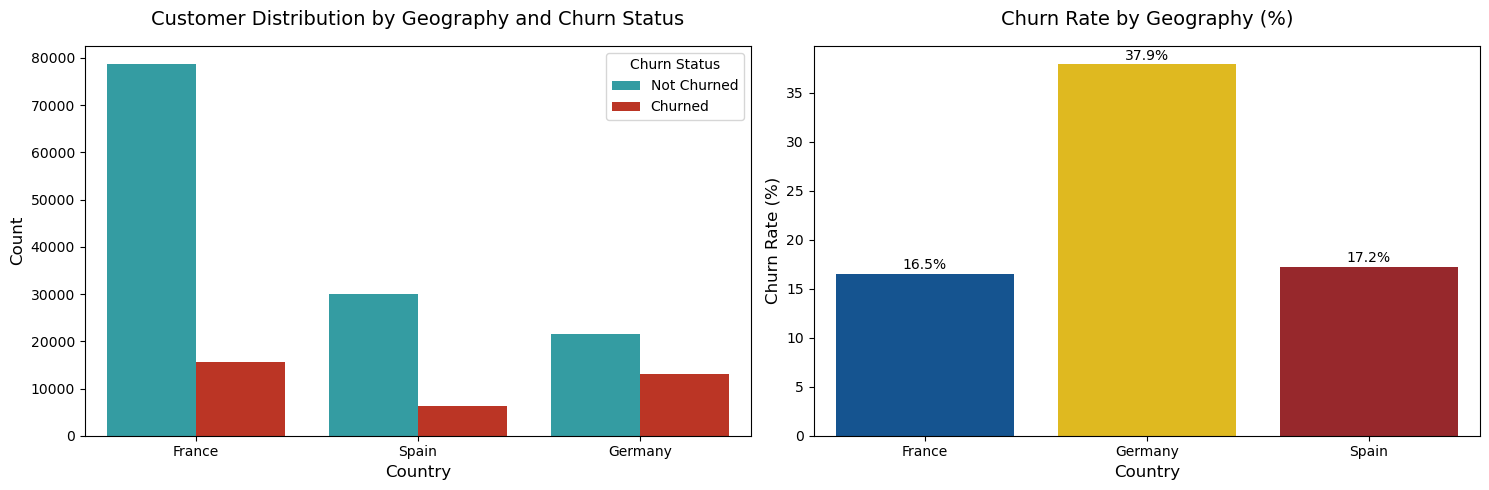

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_train, x='Geography', hue='Exited', palette=["#22adb4", "#d4210c"])
plt.title('Customer Distribution by Geography and Churn Status', fontsize=14, pad=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])

plt.subplot(1, 2, 2)
churn_by_geo = df_train.groupby('Geography')['Exited'].mean() * 100
sns.barplot(data=pd.DataFrame({'Geography': churn_by_geo.index, 'Churn_Rate': churn_by_geo.values}),
           x='Geography', y='Churn_Rate', hue='Geography', palette=["#0055A4", "#FFCC00", "#AA151B"],
           legend=False)
plt.title('Churn Rate by Geography (%)', fontsize=14, pad=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

for i, v in enumerate(churn_by_geo.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## 4. Visualizing Customer Churned by "Gender"

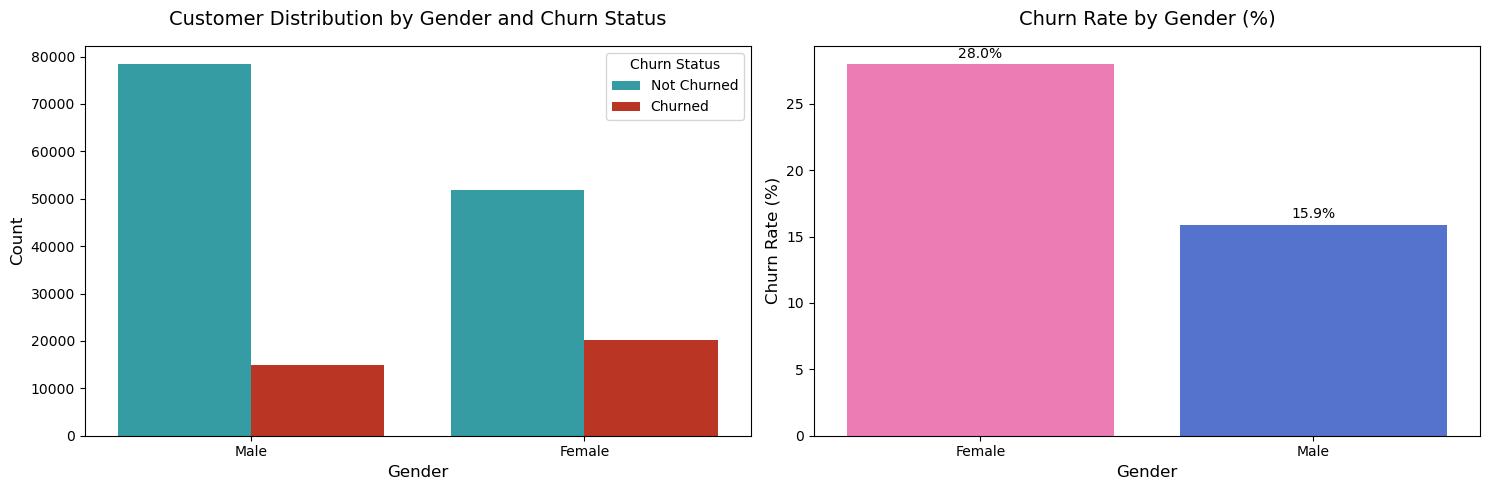

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df_train, x='Gender', hue='Exited', palette=["#22adb4", "#d4210c"])
plt.title('Customer Distribution by Gender and Churn Status', fontsize=14, pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])

plt.subplot(1, 2, 2)
churn_by_gender = df_train.groupby('Gender')['Exited'].mean() * 100
sns.barplot(data=pd.DataFrame({'Gender': churn_by_gender.index, 'Churn_Rate': churn_by_gender.values}),
           x='Gender', y='Churn_Rate', hue='Gender', palette=['#FF69B4', '#4169E1'],
           legend=False)
plt.title('Churn Rate by Gender (%)', fontsize=14, pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

for i, v in enumerate(churn_by_gender.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## 5. Visualizing Customer Churned by "Age"

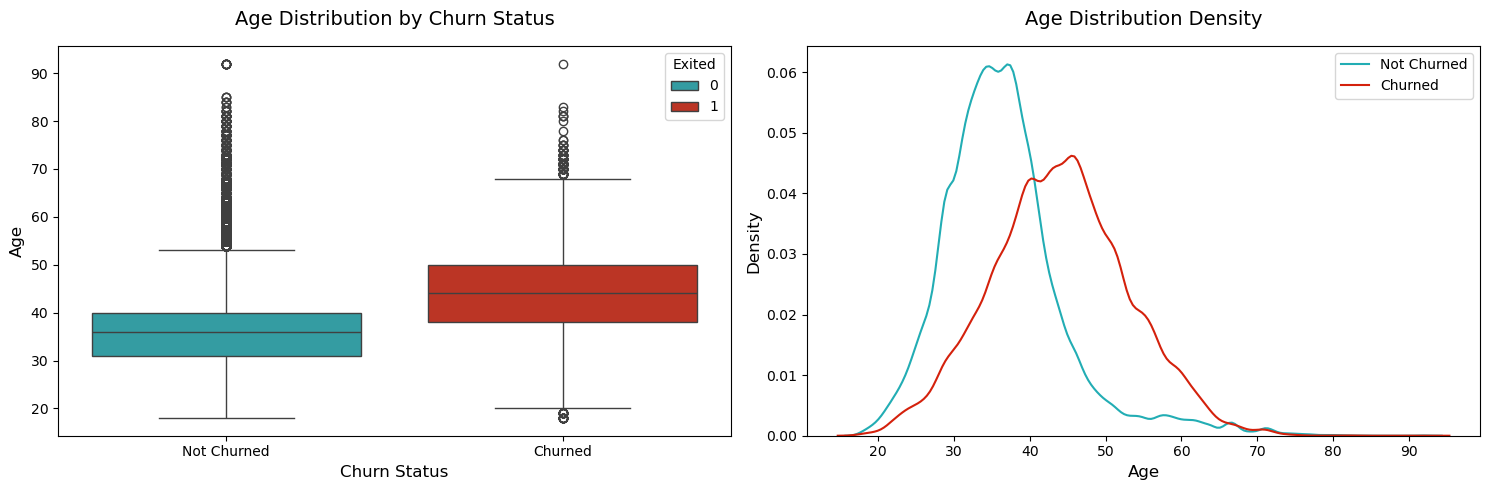

In [36]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_train, x='Exited', hue="Exited", y='Age', palette=["#22adb4", "#d4210c"])
plt.title('Age Distribution by Churn Status', fontsize=14, pad=15)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks([0, 1], ['Not Churned', 'Churned'])

plt.subplot(1, 2, 2)
sns.kdeplot(data=df_train[df_train['Exited']==0], x='Age', label='Not Churned', color="#22adb4")
sns.kdeplot(data=df_train[df_train['Exited']==1], x='Age', label='Churned', color="#d4210c")
plt.title('Age Distribution Density', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()


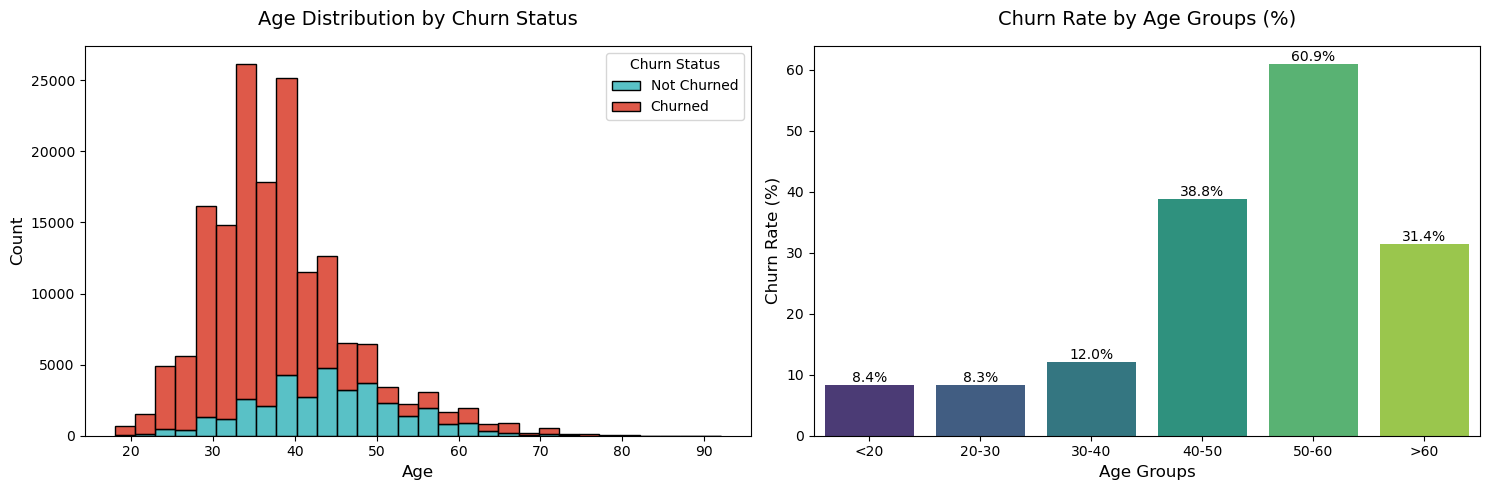

In [37]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x='Age', hue='Exited', multiple="stack", bins=30, palette=["#d4210c", "#22adb4"])
plt.title('Age Distribution by Churn Status', fontsize=14, pad=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])

plt.subplot(1, 2, 2)
churn_by_age = df_train.groupby('AgeGroup', observed=True)['Exited'].mean() * 100

age_data = pd.DataFrame({'AgeGroup': churn_by_age.index, 'Churn_Rate': churn_by_age.values})
sns.barplot(data=age_data, x='AgeGroup', y='Churn_Rate', hue='AgeGroup', palette='viridis', legend=False)
plt.title('Churn Rate by Age Groups (%)', fontsize=14, pad=15)
plt.xlabel('Age Groups', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

for i, v in enumerate(churn_by_age.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## 6. Visualizing Customer Churned by "Tenure"

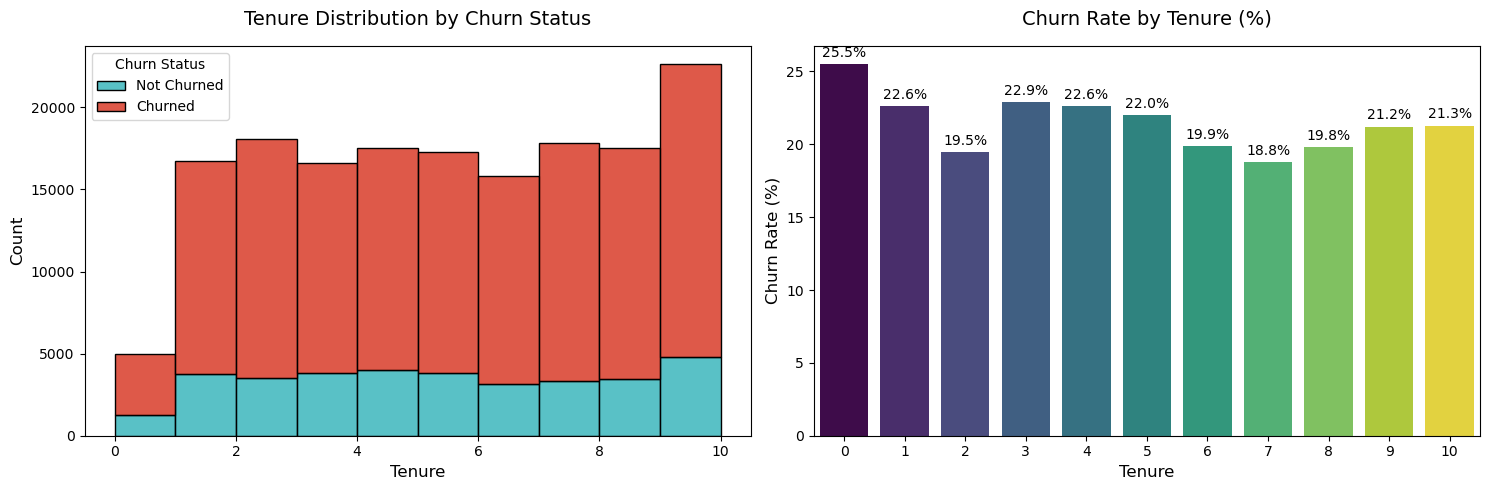

In [38]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x='Tenure', hue='Exited', multiple="stack", bins=10, palette=["#d4210c", "#22adb4"])
plt.title('Tenure Distribution by Churn Status', fontsize=14, pad=15)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])

plt.subplot(1, 2, 2)
churn_by_tenure = df_train.groupby('Tenure')['Exited'].mean() * 100

tenure_data = pd.DataFrame({'Tenure': churn_by_tenure.index, 'Churn_Rate': churn_by_tenure.values})
sns.barplot(data=tenure_data, x='Tenure', y='Churn_Rate', hue='Tenure', palette='viridis', legend=False)
plt.title('Churn Rate by Tenure (%)', fontsize=14, pad=15)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

for i, v in enumerate(churn_by_tenure.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## 7. Visualizing Customer Churned by "Balance"

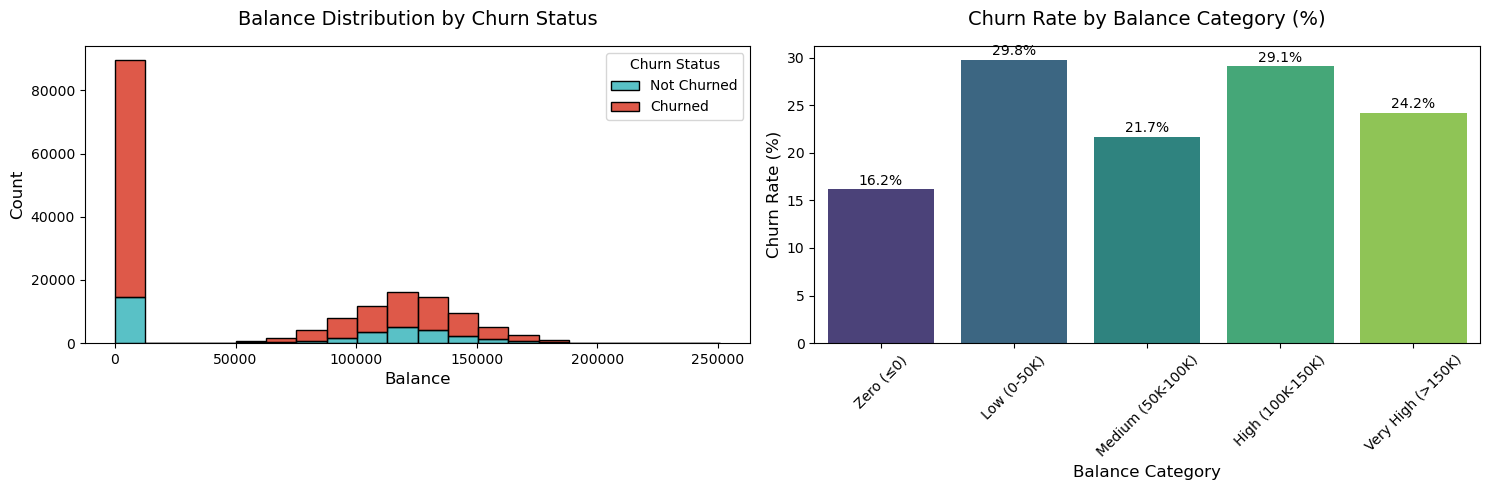

In [39]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)

sns.histplot(data=df_train, x='Balance', hue='Exited', multiple="stack", bins=20, 
            palette=["#d4210c", "#22adb4"])
plt.title('Balance Distribution by Churn Status', fontsize=14, pad=15)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])

plt.subplot(1, 2, 2)

churn_by_balance = df_train.groupby('BalanceCategory', observed=True)['Exited'].mean() * 100

balance_data = pd.DataFrame({'BalanceCategory': churn_by_balance.index, 
                           'Churn_Rate': churn_by_balance.values})
sns.barplot(data=balance_data, x='BalanceCategory', y='Churn_Rate', 
           hue='BalanceCategory', palette='viridis', legend=False)

plt.title('Churn Rate by Balance Category (%)', fontsize=14, pad=15)
plt.xlabel('Balance Category', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=45)

for i, v in enumerate(churn_by_balance.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## 8. Visualizing Customer Churned by "NumOfProducts"

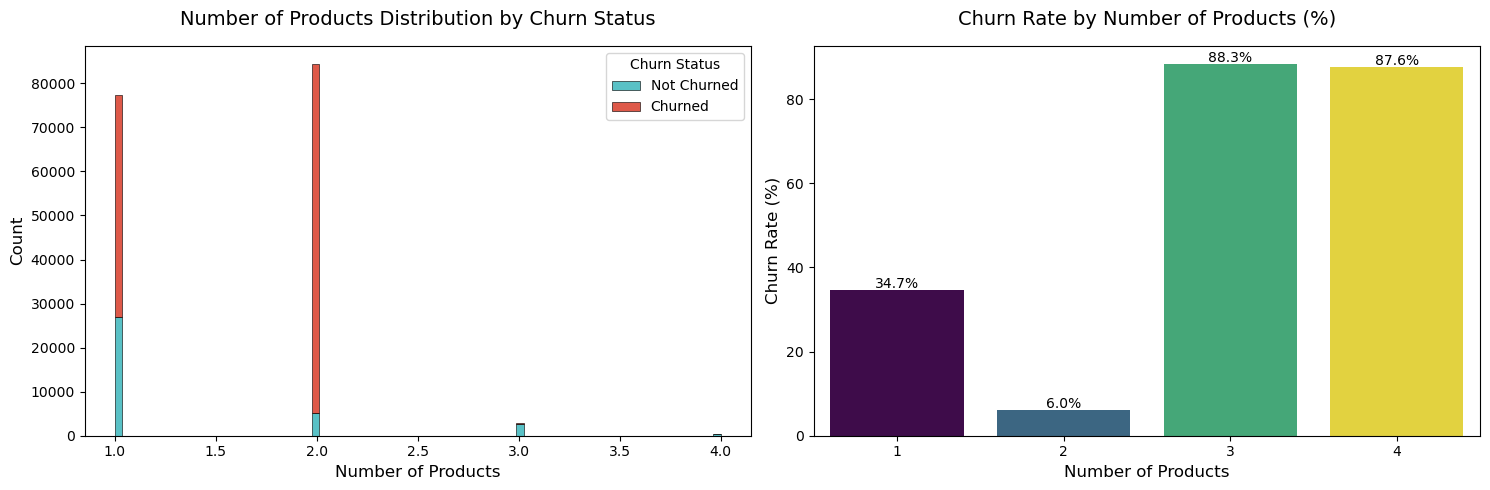

In [40]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x='NumOfProducts', hue='Exited', multiple="stack",
            palette=["#d4210c", "#22adb4"])
plt.title('Number of Products Distribution by Churn Status', fontsize=14, pad=15)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])

plt.subplot(1, 2, 2)
churn_by_products = df_train.groupby('NumOfProducts')['Exited'].mean() * 100

products_data = pd.DataFrame({'NumOfProducts': churn_by_products.index,
                            'Churn_Rate': churn_by_products.values})
sns.barplot(data=products_data, x='NumOfProducts', y='Churn_Rate', 
           hue='NumOfProducts', palette='viridis', legend=False)

plt.title('Churn Rate by Number of Products (%)', fontsize=14, pad=15)
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

for i, v in enumerate(churn_by_products.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## 9. Visualizing Customer Churned by "HasCrCard"

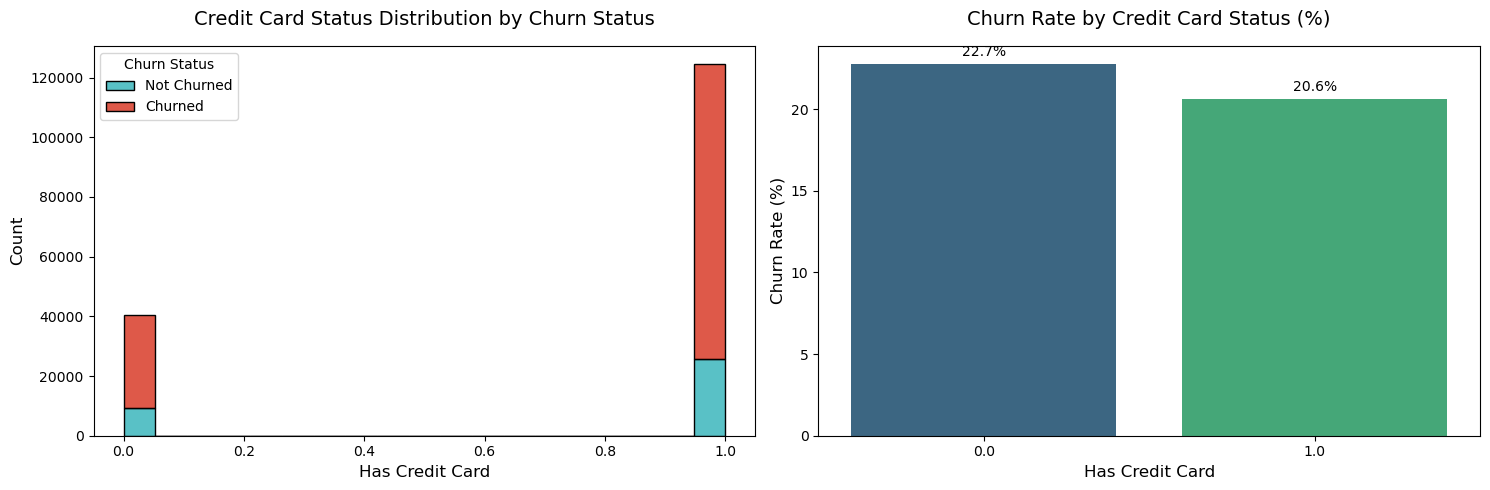

In [41]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x='HasCrCard', hue='Exited', multiple="stack",
            palette=["#d4210c", "#22adb4"])
plt.title('Credit Card Status Distribution by Churn Status', fontsize=14, pad=15)
plt.xlabel('Has Credit Card', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])

plt.subplot(1, 2, 2)
churn_by_card = df_train.groupby('HasCrCard')['Exited'].mean() * 100

card_data = pd.DataFrame({'HasCrCard': churn_by_card.index,
                         'Churn_Rate': churn_by_card.values})
sns.barplot(data=card_data, x='HasCrCard', y='Churn_Rate',
           hue='HasCrCard', palette='viridis', legend=False)

plt.title('Churn Rate by Credit Card Status (%)', fontsize=14, pad=15)
plt.xlabel('Has Credit Card', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

for i, v in enumerate(churn_by_card.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## 10. Visualizing Customer Churned by "IsActiveMember"

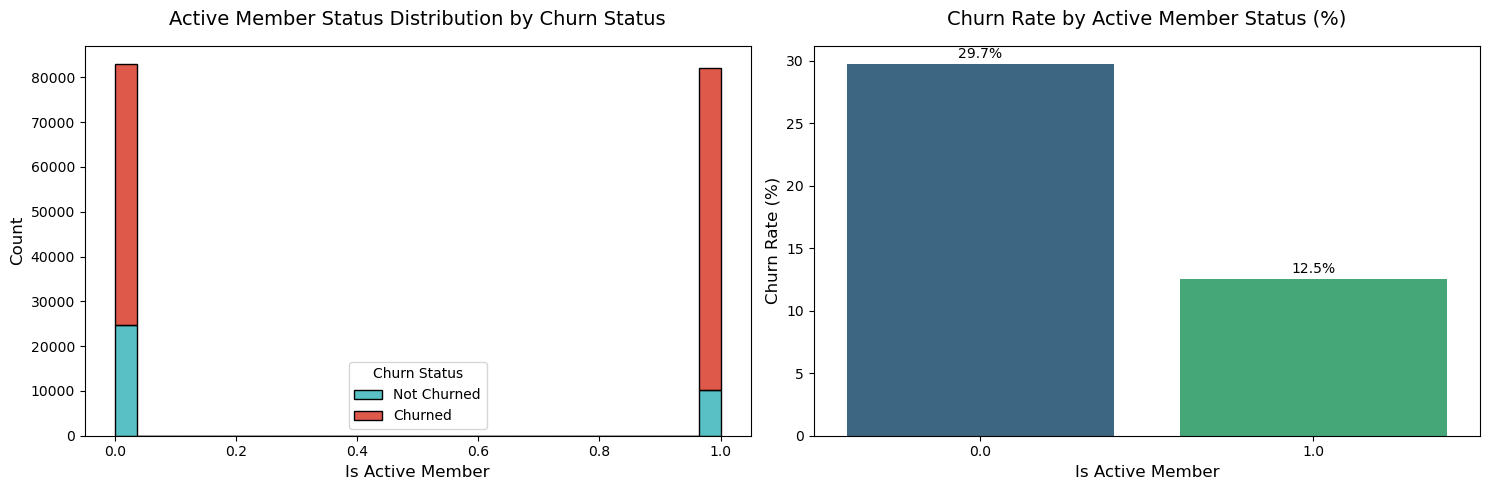

In [42]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x='IsActiveMember', hue='Exited', multiple="stack",
            palette=["#d4210c", "#22adb4"])
plt.title('Active Member Status Distribution by Churn Status', fontsize=14, pad=15)
plt.xlabel('Is Active Member', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])

plt.subplot(1, 2, 2)
churn_by_active = df_train.groupby('IsActiveMember')['Exited'].mean() * 100

active_data = pd.DataFrame({'IsActiveMember': churn_by_active.index,
                          'Churn_Rate': churn_by_active.values})
sns.barplot(data=active_data, x='IsActiveMember', y='Churn_Rate',
           hue='IsActiveMember', palette='viridis', legend=False)

plt.title('Churn Rate by Active Member Status (%)', fontsize=14, pad=15)
plt.xlabel('Is Active Member', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)

for i, v in enumerate(churn_by_active.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


## 11. Visualizing Customer Churned by "EstimatedSalary"

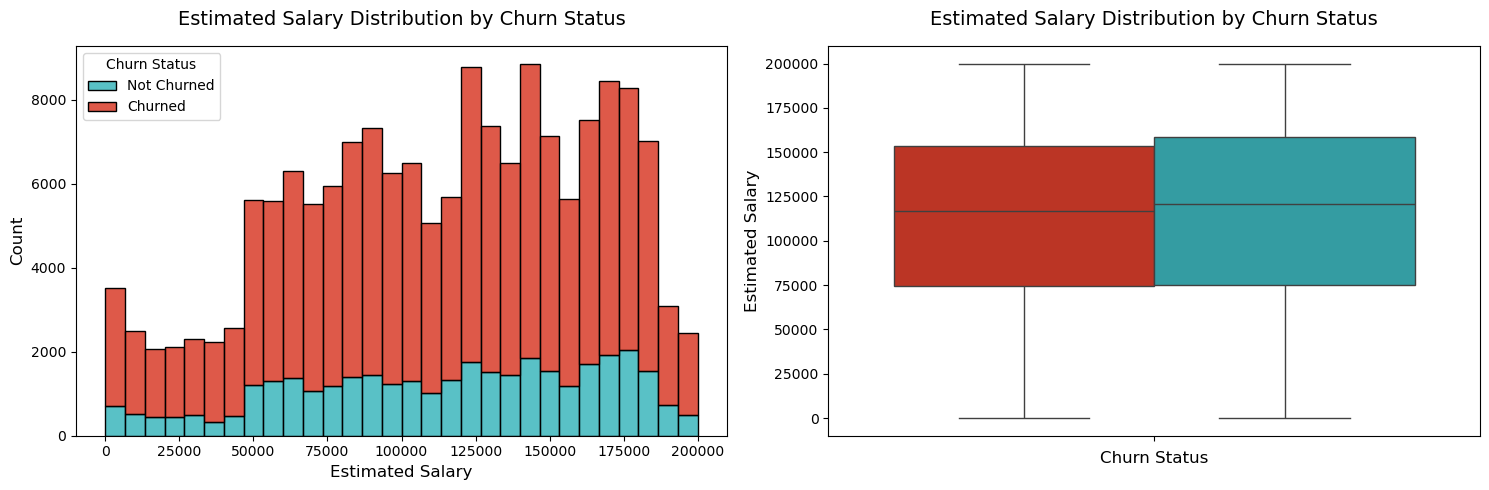

In [43]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x='EstimatedSalary', hue='Exited', multiple="stack",
             palette=["#d4210c", "#22adb4"], bins=30)
plt.title('Estimated Salary Distribution by Churn Status', fontsize=14, pad=15)
plt.xlabel('Estimated Salary', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])

plt.subplot(1, 2, 2)
sns.boxplot(data=df_train, y='EstimatedSalary', hue='Exited', legend=False, palette=["#d4210c", "#22adb4"]) 
plt.title('Estimated Salary Distribution by Churn Status', fontsize=14, pad=15)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Estimated Salary', fontsize=12)

plt.tight_layout()
plt.show()

## 12. Correlation Matrix

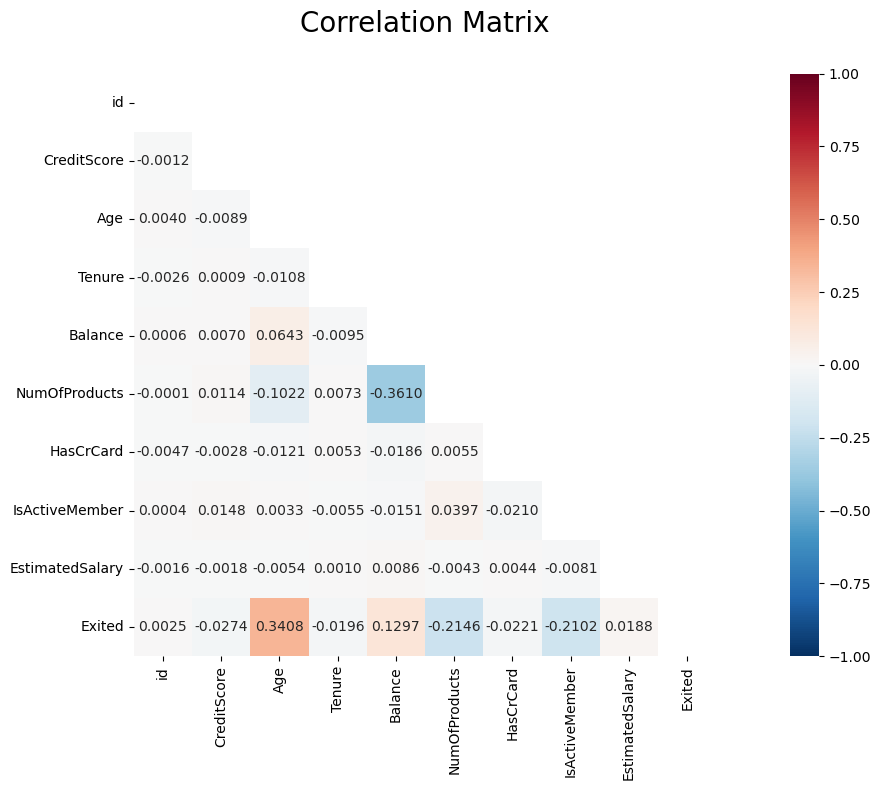

In [44]:
numeric_df = df_train.select_dtypes(include=['float64', 'int64'])

corr = numeric_df.corr()

plt.figure(figsize=(15, 8))

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            mask=mask,
            annot=True,
            fmt='.4f',
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            square=True)

plt.title('Correlation Matrix', fontsize=20, pad=30)
plt.tight_layout()

plt.show()

# FEATURE ENGINEERING

## 1. Creating New Feature From "CreditScore" Feature

In [104]:
df_train.CreditScore.describe()

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64

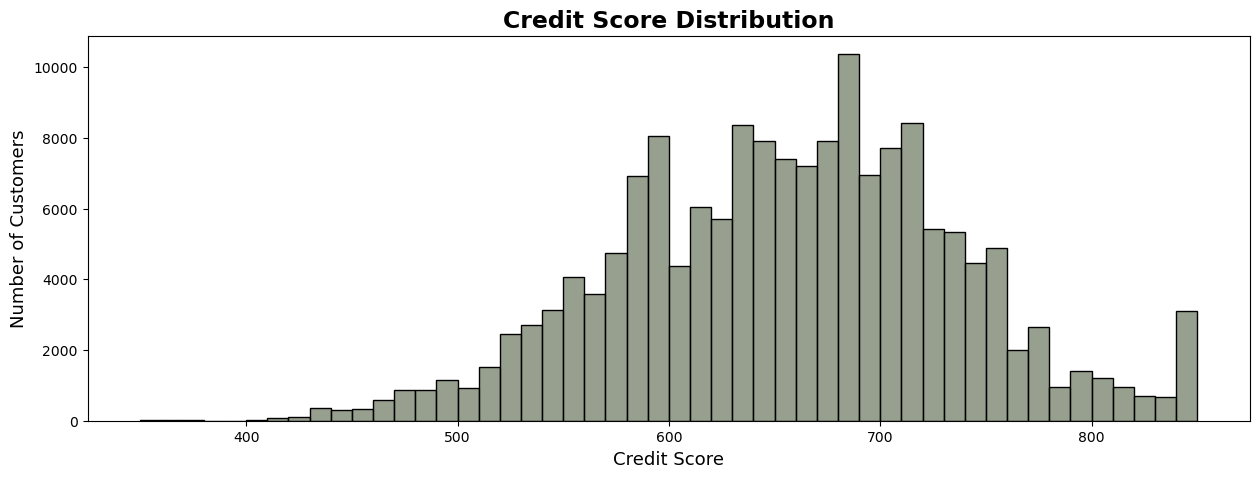

In [105]:
plt.figure(figsize=(15,5))
sns.histplot(df_train['CreditScore'], bins=50, color='#74806a')
plt.title('Credit Score Distribution', fontsize=17, fontweight='bold')
plt.xlabel('Credit Score', fontsize=13)
plt.ylabel('Number of Customers', fontsize=13)
plt.show()

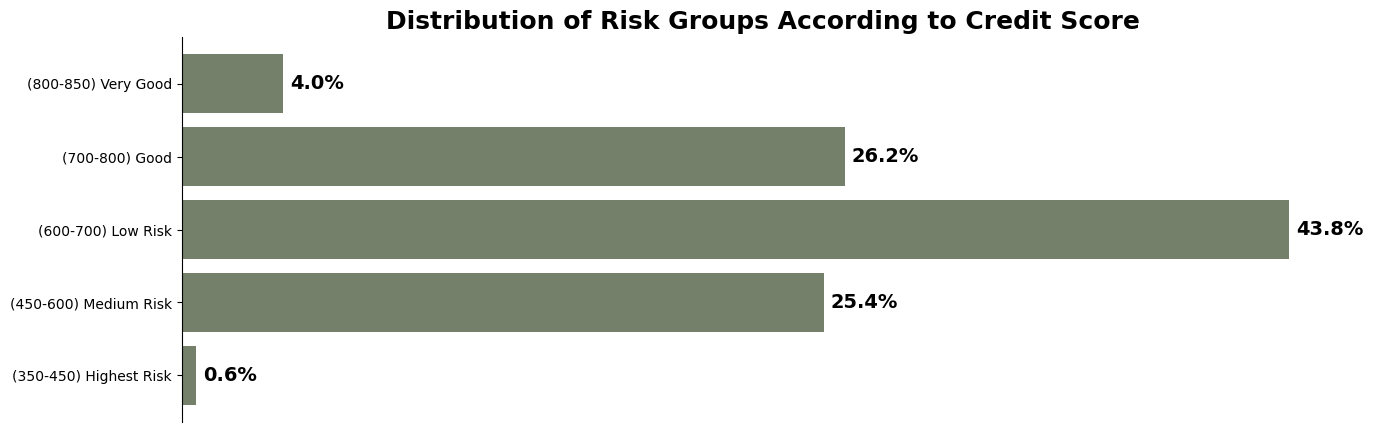

In [106]:
def categorize_credit_score(credit_score):
    
    highest_risk = ((credit_score >= 350) & (credit_score < 450)).sum()
    medium_risk = ((credit_score >= 450) & (credit_score < 600)).sum()
    low_risk = ((credit_score >= 600) & (credit_score < 700)).sum()
    good = ((credit_score >= 700) & (credit_score < 800)).sum()
    very_good = ((credit_score >= 800) & (credit_score <= 850)).sum()
    total = len(credit_score) 
    
    return {
        
        '(350-450) Highest Risk': (highest_risk / total) * 100,
        '(450-600) Medium Risk': (medium_risk / total) * 100,
        '(600-700) Low Risk': (low_risk / total) * 100,
        '(700-800) Good': (good / total) * 100,
        '(800-850) Very Good': (very_good / total) * 100
        
    }


risk_groups = categorize_credit_score(df_train['CreditScore'])

categories = list(risk_groups.keys())

percentages = list(risk_groups.values())


fig, ax = plt.subplots(figsize=(15,5))
bars = plt.barh(categories, percentages, color='#74806a')
ax.spines[['top', 'bottom', 'right']].set_visible(False)
ax.xaxis.set_visible(False)
ax.bar_label(bars, padding= 5, fmt=('%.1f%%'), fontweight='bold', fontsize=14)
plt.title('Distribution of Risk Groups According to Credit Score', fontsize=18, fontweight='bold')
plt.show()

In [107]:
def risk_group(credit_score):
    
    if (credit_score >= 350) & (credit_score < 450):
        return "Highest Risk"
    elif (credit_score >= 450) & (credit_score < 600):
        return "Medium Risk"
    elif (credit_score >= 600) & (credit_score < 700):
        return "Low Risk"
    elif (credit_score >= 700) & (credit_score < 800):
        return "Good"
    elif (credit_score >= 800) & (credit_score <= 850):
        return "Very Good"

In [108]:
df_train['CreditNote']=df_train['CreditScore'].apply(risk_group)

In [109]:
df_train.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditNote
0,0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,Low Risk
1,1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,Low Risk
2,2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,Low Risk
3,3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,Medium Risk
4,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,Good


In [110]:
df_train.groupby('CreditNote')['id'].count()

CreditNote
Good            43275
Highest Risk      927
Low Risk        72286
Medium Risk     41913
Very Good        6633
Name: id, dtype: int64

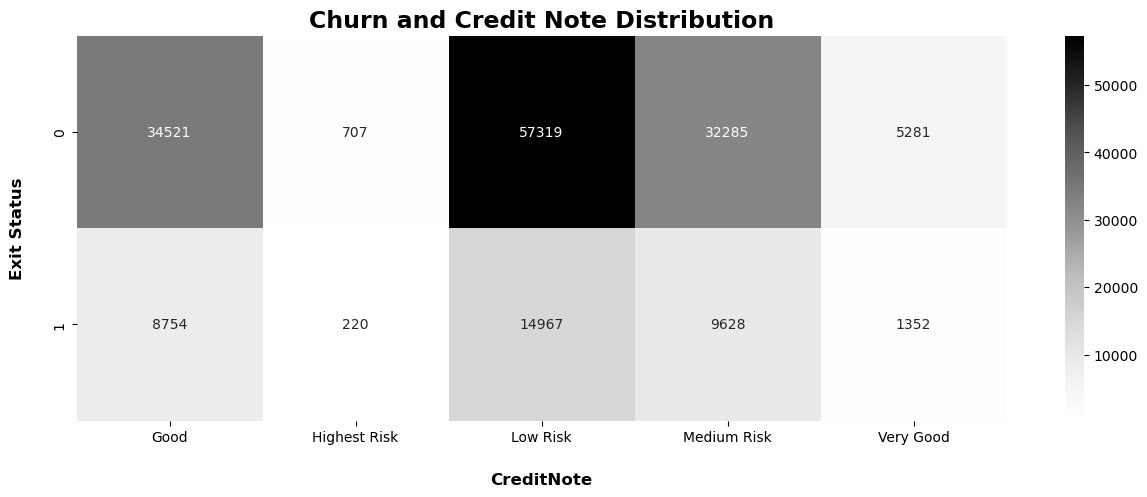

In [111]:
crosstab = pd.crosstab(df_train['Exited'], df_train['CreditNote'])

plt.figure(figsize=(15,5))
sns.heatmap(crosstab, annot=True, fmt='g', cmap='Grays')
plt.title('Churn and Credit Note Distribution', fontsize=17, fontweight='bold')
plt.xlabel('CreditNote', fontsize=12, fontweight='bold', labelpad=20)
plt.ylabel('Exit Status', fontsize=12, fontweight='bold', labelpad=20)
plt.show()

In [112]:
data = df_train[['CreditScore', 'Exited']]
corr=data.corr()
print(corr)

             CreditScore    Exited
CreditScore     1.000000 -0.027383
Exited         -0.027383  1.000000


## 2. Creating New Feature From "Age" Feature

In [113]:
df_train['AgeGroup'] = pd.cut(df_train['Age'],
                              bins=[0, 20, 30, 40, 50, 60, 100], 
                              labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])

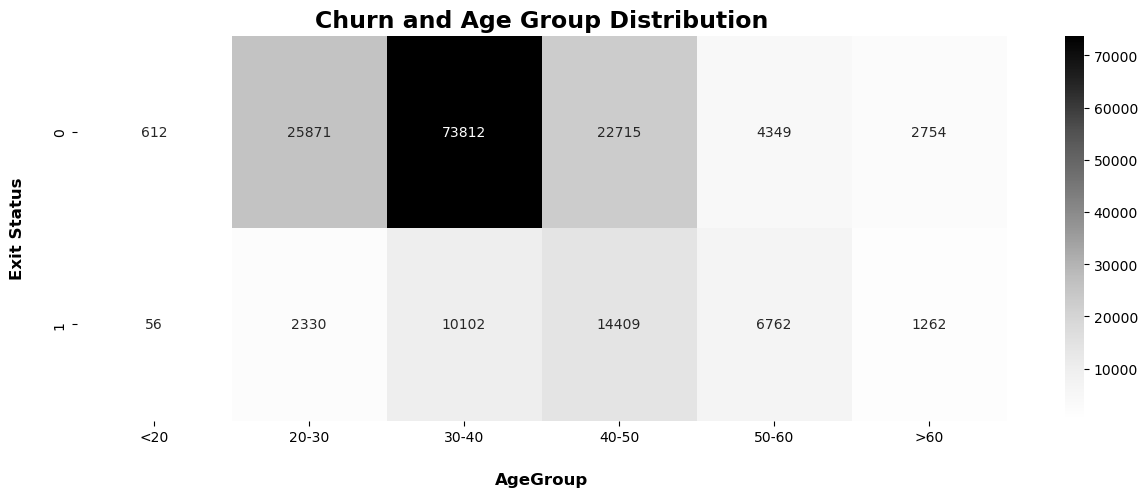

In [114]:
crosstab = pd.crosstab(df_train['Exited'], df_train['AgeGroup'])

plt.figure(figsize=(15,5))
sns.heatmap(crosstab, annot=True, fmt='g', cmap='Grays')
plt.title('Churn and Age Group Distribution', fontsize=17, fontweight='bold')
plt.xlabel('AgeGroup', fontsize=12, fontweight='bold', labelpad=20)
plt.ylabel('Exit Status', fontsize=12, fontweight='bold', labelpad=20)
plt.show()

In [115]:
data = df_train[['Age', 'Exited']]
corr=data.corr()
print(corr)

             Age    Exited
Age     1.000000  0.340768
Exited  0.340768  1.000000


## 3. Creating New Feature From "Balance" Feature

In [116]:
bins = [df_train['Balance'].min()-1, 0, 50000, 100000, 150000, df_train['Balance'].max()]
labels = ['Zero (≤0)', 'Low (0-50K)', 'Medium (50K-100K)', 'High (100K-150K)', 'Very High (>150K)']
df_train['BalanceCategory'] = pd.cut(df_train['Balance'], bins=bins, labels=labels)

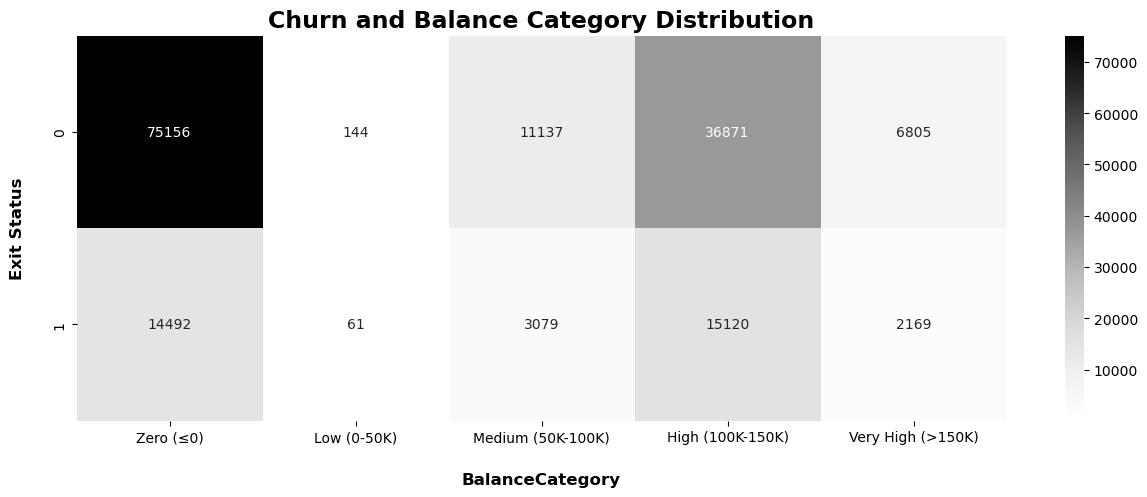

In [117]:
crosstab = pd.crosstab(df_train['Exited'], df_train['BalanceCategory'])

plt.figure(figsize=(15,5))
sns.heatmap(crosstab, annot=True, fmt='g', cmap='Grays')
plt.title('Churn and Balance Category Distribution', fontsize=17, fontweight='bold')
plt.xlabel('BalanceCategory', fontsize=12, fontweight='bold', labelpad=20)
plt.ylabel('Exit Status', fontsize=12, fontweight='bold', labelpad=20)
plt.show()

In [118]:
data = df_train[['Balance', 'Exited']]
corr=data.corr()
print(corr)

          Balance    Exited
Balance  1.000000  0.129743
Exited   0.129743  1.000000


# CLUSTERING

## 1. KMeans

In [119]:
df=df_train

In [120]:
df.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditNote,AgeGroup,BalanceCategory
0,0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,Low Risk,30-40,Zero (≤0)
1,1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,Low Risk,30-40,Zero (≤0)
2,2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,Low Risk,30-40,Zero (≤0)
3,3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,Medium Risk,30-40,High (100K-150K)
4,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,Good,30-40,Zero (≤0)


In [121]:
columns=['AgeGroup']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0        
    df.loc[(df[c]=='<20'),Range]=1
    df.loc[(df[c]=='20-30'),Range]=2
    df.loc[(df[c]=='30-40'),Range]=3
    df.loc[(df[c]=='40-50'),Range]=4
    df.loc[(df[c]=='50-60'),Range]=5
    df.loc[(df[c]=='>60'),Range]=6

In [122]:
columns=['Geography']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0        
    df.loc[(df[c]=='Spain'),Range]=1
    df.loc[(df[c]=='France'),Range]=2
    df.loc[(df[c]=='Germany'),Range]=3

In [123]:
columns=['CreditNote']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0        
    df.loc[(df[c]=='Highest Risk'),Range]=1
    df.loc[(df[c]=='Medium Risk'),Range]=2
    df.loc[(df[c]=='Low Risk'),Range]=3
    df.loc[(df[c]=='Good'),Range]=4
    df.loc[(df[c]=='Very Good'),Range]=5

In [124]:
columns=['Tenure']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0        
    df.loc[((df[c]==0)),Range]=1
    df.loc[((df[c]==1)),Range]=2
    df.loc[((df[c]==2)),Range]=3
    df.loc[((df[c]==3)),Range]=4
    df.loc[((df[c]==4)),Range]=5
    df.loc[((df[c]==5)),Range]=6
    df.loc[((df[c]==6)),Range]=7
    df.loc[((df[c]==7)),Range]=8
    df.loc[((df[c]==8)),Range]=9
    df.loc[((df[c]==9)),Range]=10
    df.loc[((df[c]==10)),Range]=11

In [125]:
columns=['BalanceCategory']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0        
    df.loc[(df[c]=='Zero (≤0)'),Range]=1
    df.loc[(df[c]=='Low (0-50K)'),Range]=2
    df.loc[(df[c]=='Medium (50K-100K)'),Range]=3
    df.loc[(df[c]=='High (100K-150K)'),Range]=4
    df.loc[(df[c]=='Very High (>150K)'),Range]=5

In [126]:
columns=['NumOfProducts']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0        
    df.loc[(df[c]==1),Range]=1
    df.loc[(df[c]==2),Range]=2
    df.loc[((df[c]==3)),Range]=3
    df.loc[((df[c]==4)),Range]=4

In [127]:
columns=['EstimatedSalary']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0        
    df.loc[((df[c]>=0)&(df[c]<20001)),Range]=1
    df.loc[((df[c]>=20001)&(df[c]<50001)),Range]=2
    df.loc[((df[c]>=50001)&(df[c]<75001)),Range]=3
    df.loc[((df[c]>=75001)&(df[c]<100001)),Range]=4
    df.loc[((df[c]>=100001)&(df[c]<125001)),Range]=5
    df.loc[((df[c]>=125001)&(df[c]<150001)),Range]=6
    df.loc[((df[c]>=150001)&(df[c]<175001)),Range]=7
    df.loc[((df[c]>=175001)),Range]=8

In [128]:
df.drop(['id', 'Age', 'AgeGroup', 'Geography', 'Gender', 'CreditNote',
       'CreditScore', 'Tenure', 'Balance', 'BalanceCategory',
       'NumOfProducts',  'HasCrCard',
       'IsActiveMember', 'EstimatedSalary',
       'Exited'], axis=1, inplace=True)

X= np.asarray(df)

In [129]:
df.head()

,AgeGroup_RANGE,Geography_RANGE,CreditNote_RANGE,Tenure_RANGE,BalanceCategory_RANGE,NumOfProducts_RANGE,EstimatedSalary_RANGE
0,3,2,3,4,1,2,8
1,3,2,3,2,1,2,2
2,3,2,3,11,1,2,8
3,3,2,2,3,4,1,4
4,3,1,4,6,1,2,1


In [130]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(165034, 7)

In [131]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  

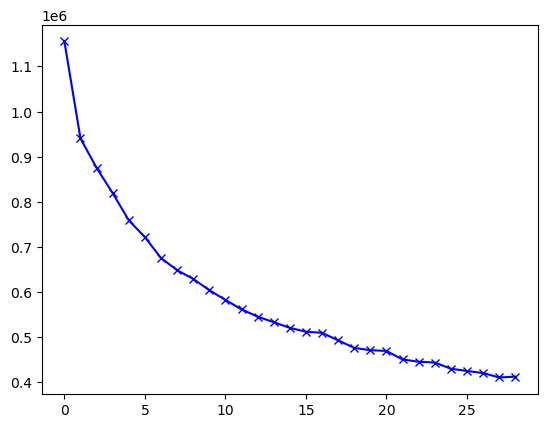

In [132]:
plt.plot(cost, 'bx-')

In [133]:
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_

In [134]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,AgeGroup_RANGE,Geography_RANGE,CreditNote_RANGE,Tenure_RANGE,BalanceCategory_RANGE,NumOfProducts_RANGE,EstimatedSalary_RANGE,cluster
0,3,2,3,4,1,2,8,1
1,3,2,3,2,1,2,2,0
2,3,2,3,11,1,2,8,4
3,3,2,2,3,4,1,4,3
4,3,1,4,6,1,2,1,0


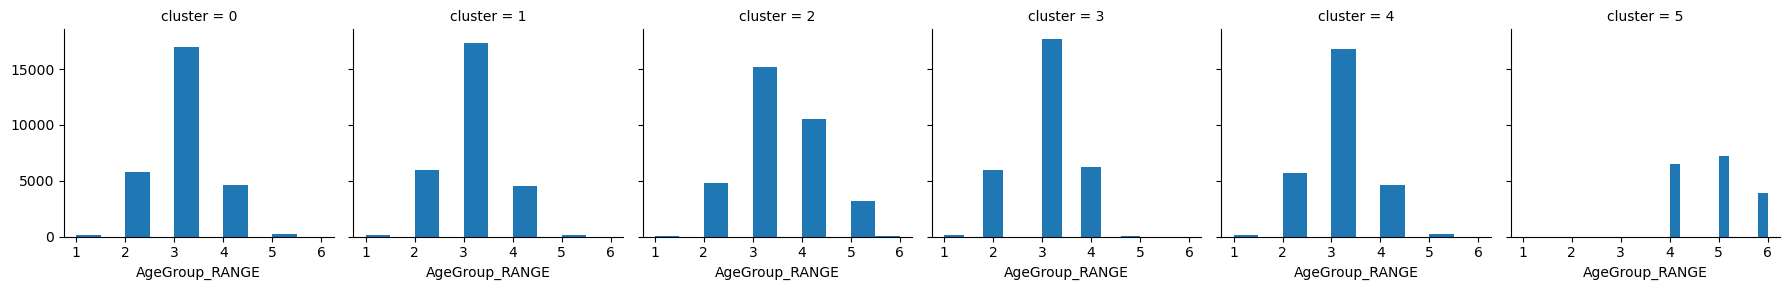

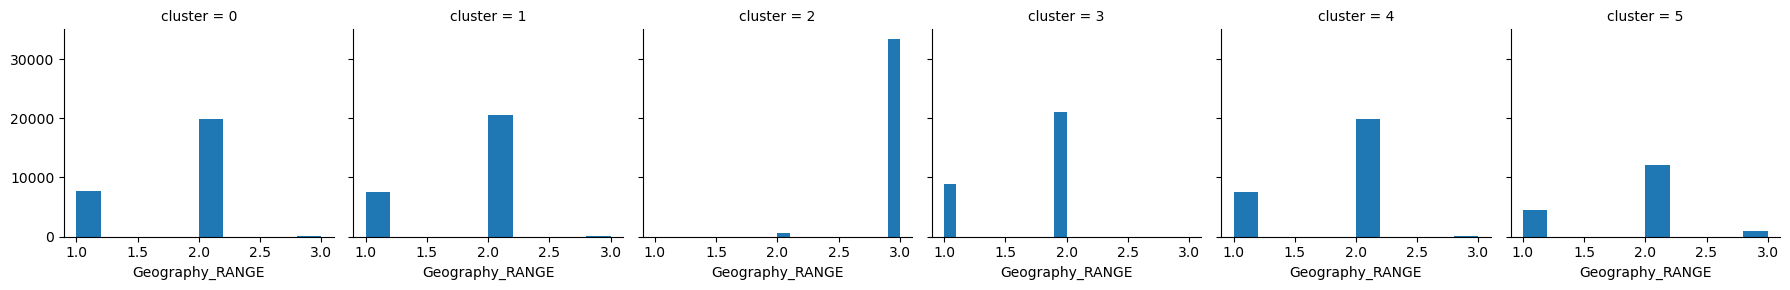

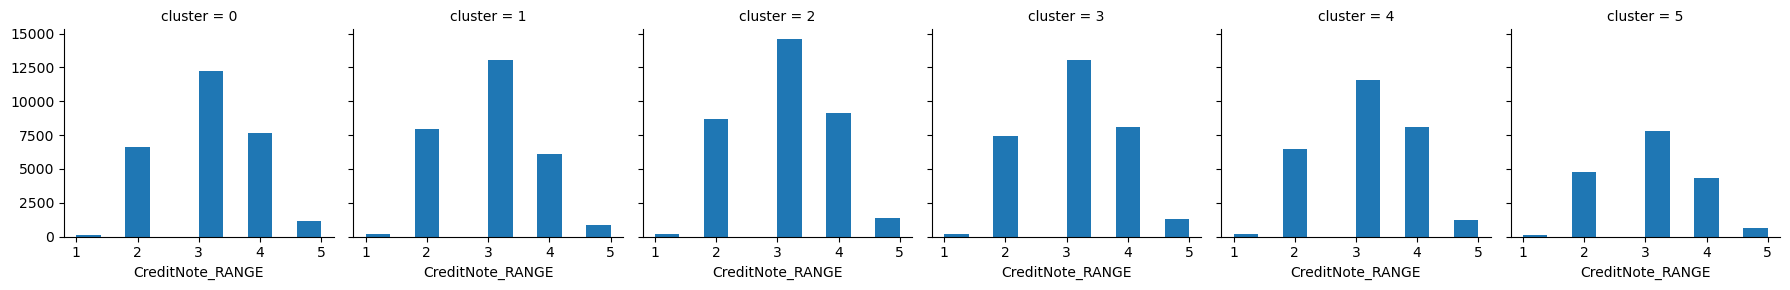

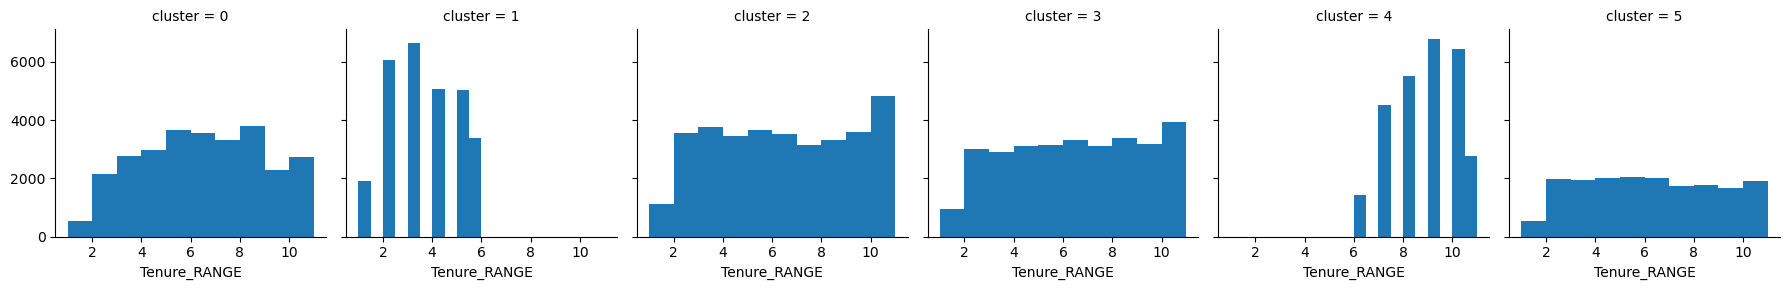

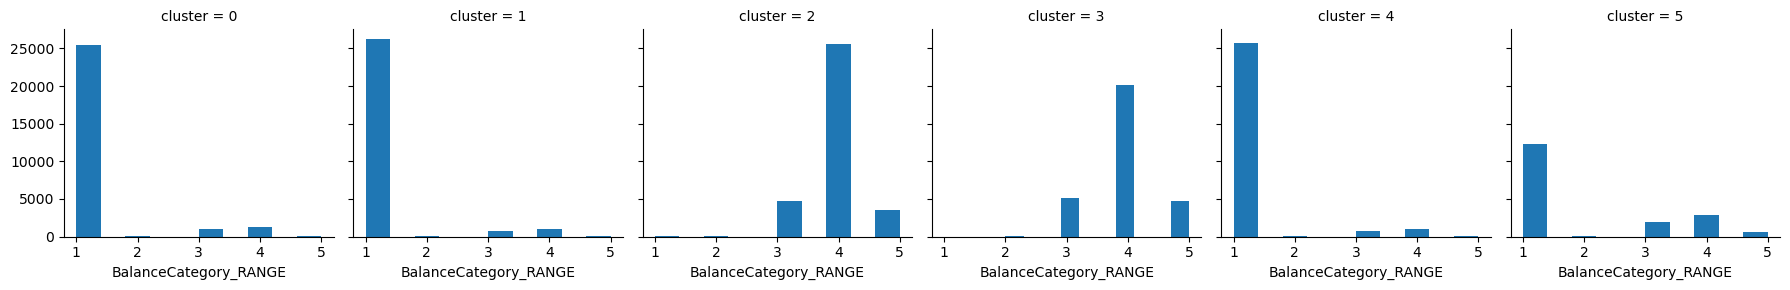

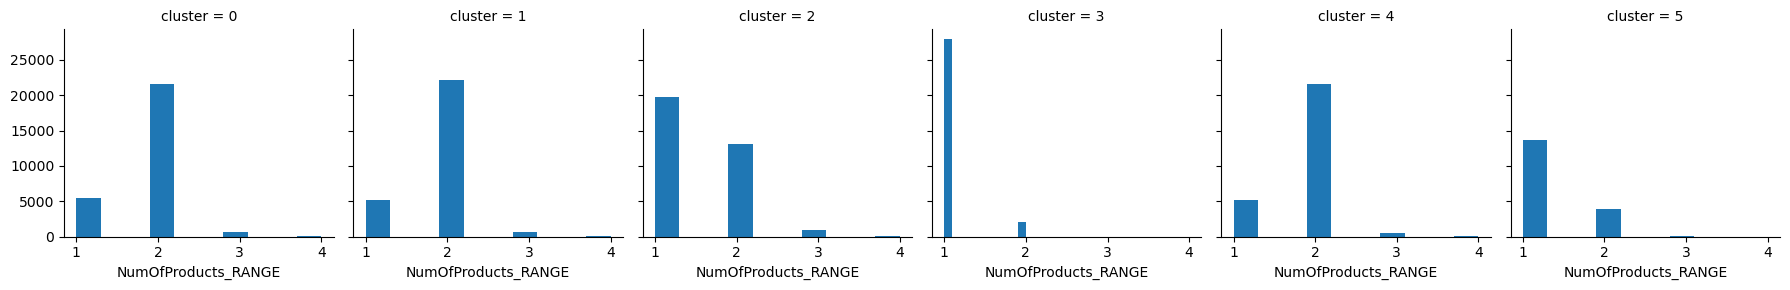

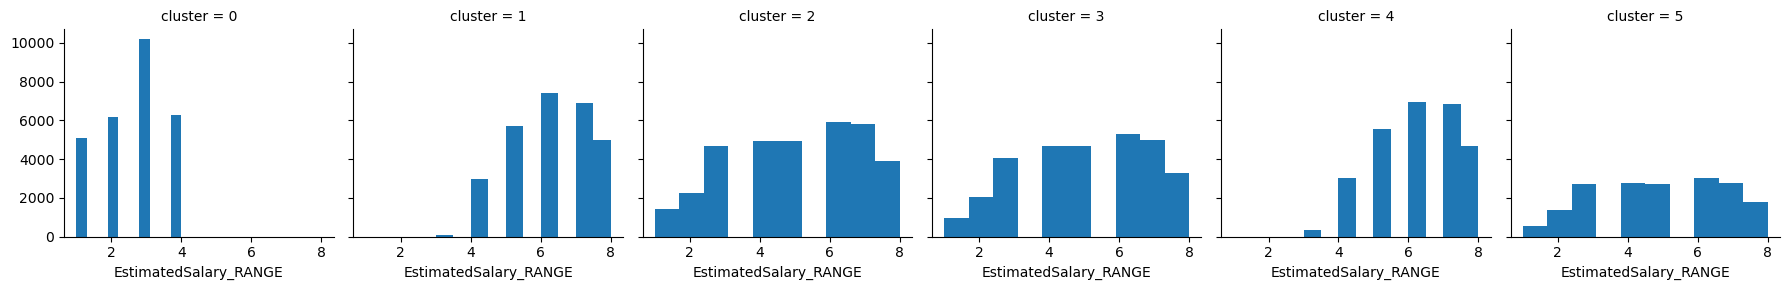

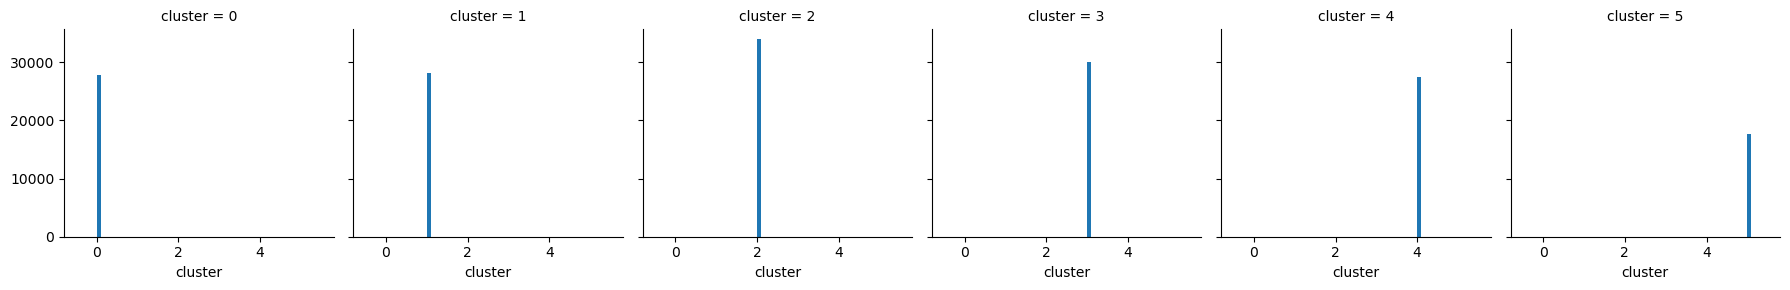

In [135]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [136]:
selected_indices = list(range(10000))  # İlk 10.000 veri için indeks
X_subset = X[selected_indices]
labels_subset = labels[selected_indices]

dist = 1 - cosine_similarity(X_subset)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(10000, 2)

C:\Users\volkancamli\AppData\Local\Temp\ipykernel_3004\2975373384.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


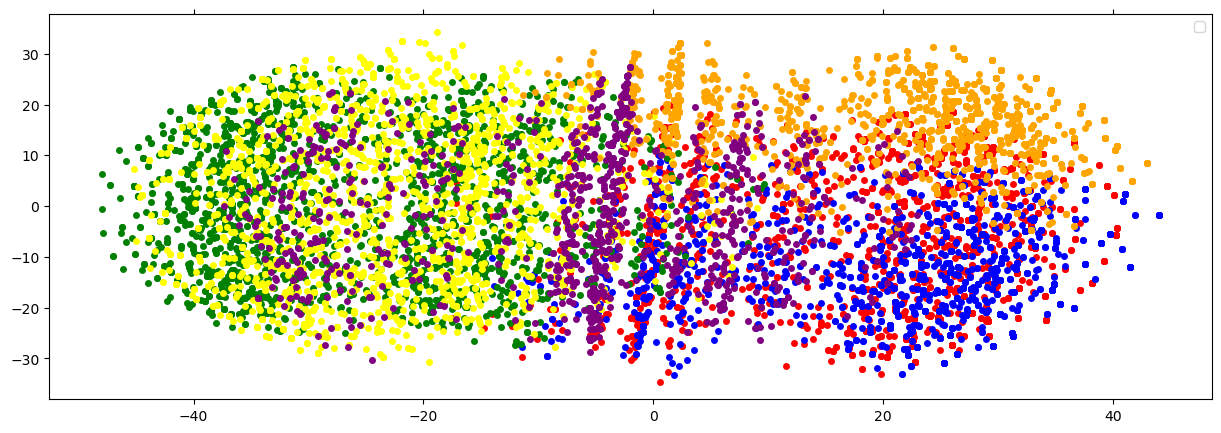

In [137]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: '', 
         1: '', 
         2: '', 
         3: '', 
         4: '',
         5:''}
  
dframe = pd.DataFrame({'x': x, 'y': y, 'label': labels_subset})
groups = dframe.groupby('label')

fig, ax = plt.subplots(figsize=(15, 5)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("")
plt.show()

# DATA PRE-PROCESSING

In [6]:
categorical_cols = df_train.select_dtypes(include=['object','category']).columns
categorical_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [7]:
categorical_columns = df_test.select_dtypes(include=['object','category']).columns
categorical_columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [8]:
label_encoders = {}

for column in categorical_cols:
    le = LabelEncoder()
    df_train[column] = df_train[column].astype(str)
    df_train[column] = le.fit_transform(df_train[column])
    label_encoders[column] = le

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df_test[column] = df_test[column].astype(str)
    df_test[column] = le.fit_transform(df_test[column])
    label_encoders[column] = le

In [10]:
print(df_train[categorical_cols].dtypes)
print(df_test[categorical_columns].dtypes)

Surname      int32
Geography    int32
Gender       int32
dtype: object
Surname      int32
Geography    int32
Gender       int32
dtype: object


In [11]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


# MODEL EVALUATION

## 1. Logistic Regression

In [12]:
df_train.drop(columns=['id'],inplace=True)

In [13]:
X = df_train.drop(columns=['Exited'])
y = df_train['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.8273699518284
Confusion Matrix:
[[24884  1168]
 [ 4530  2425]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     26052
           1       0.67      0.35      0.46      6955

    accuracy                           0.83     33007
   macro avg       0.76      0.65      0.68     33007
weighted avg       0.81      0.83      0.81     33007



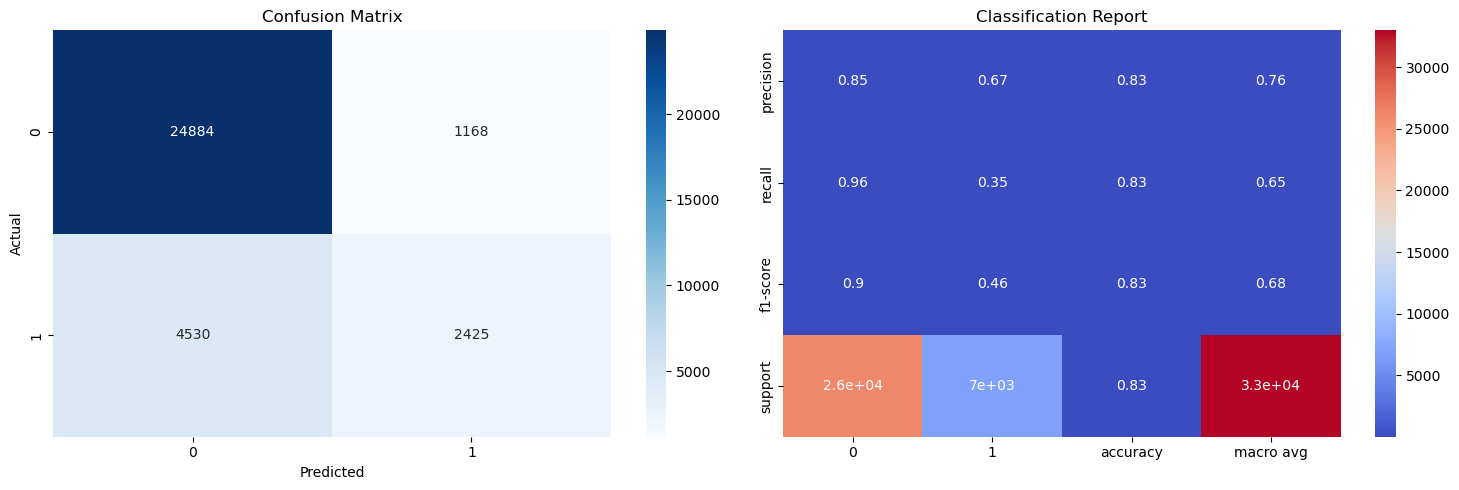

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
class_report_dict = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).transpose()
sns.heatmap(class_report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')

plt.tight_layout()
plt.show()

## 2. Decision Trees

In [15]:
X = df_train.drop(columns=['Exited'])
y = df_train['Exited']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
dtree = DecisionTreeClassifier()

In [17]:
param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_features": [None, "sqrt", "log2"],
    "random_state": [0, 42]
}


In [18]:
smt = SMOTE(random_state=42)

In [19]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

In [20]:
x_train_resampled, y_train_resampled = resample(
    x_train_resampled,
    y_train_resampled,
    n_samples=10000,
    random_state=42
)

In [21]:
print(x_train_resampled.shape ,y_train_resampled.shape)

(10000, 12) (10000,)


In [22]:
y_train_resampled.value_counts().to_frame()

,count
Exited,
1,5019
0,4981


In [23]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [24]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n\n")
best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'random_state': 0,
 'splitter': 'best'}

In [25]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=6, min_samples_split=4, random_state=0)

In [26]:
y_train_pred = dtree.predict(x_train_resampled)
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Training Data is =>",round(accuracy_score(y_train_resampled,y_train_pred)*100,2),"%")
print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Training Data is => 86.05 %
Accuracy Score of Model on Testing Data  is => 82.14 %


In [27]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8214015208895082
Recall Score of the Model is => 0.8214015208895082
Precision Score of the Model is => 0.8214015208895082


In [28]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})

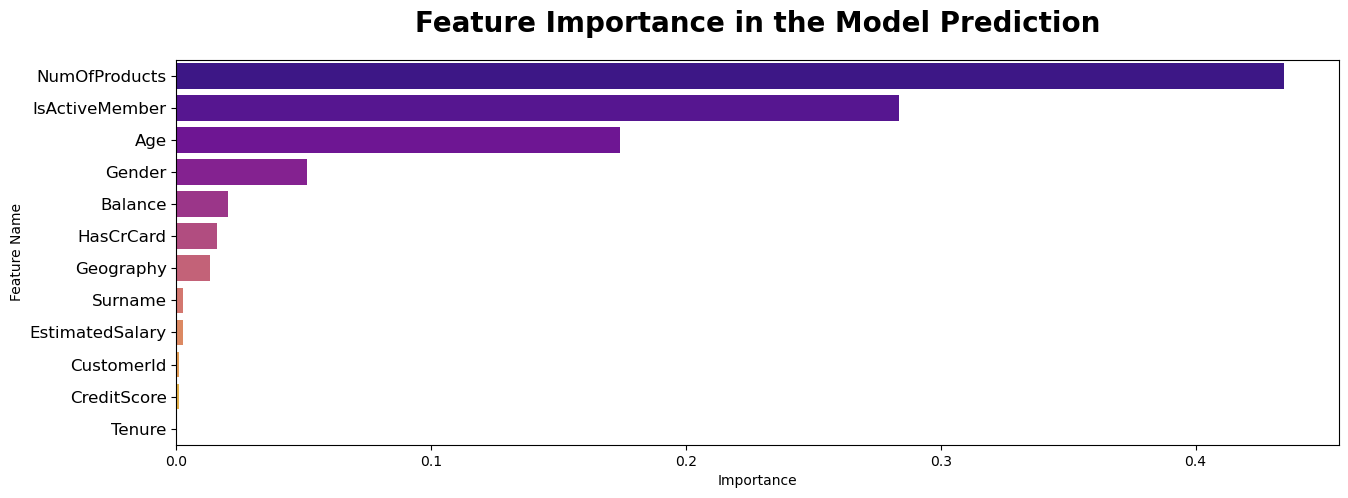

In [29]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x="Importance", hue="Feature Name", y="Feature Name",  data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

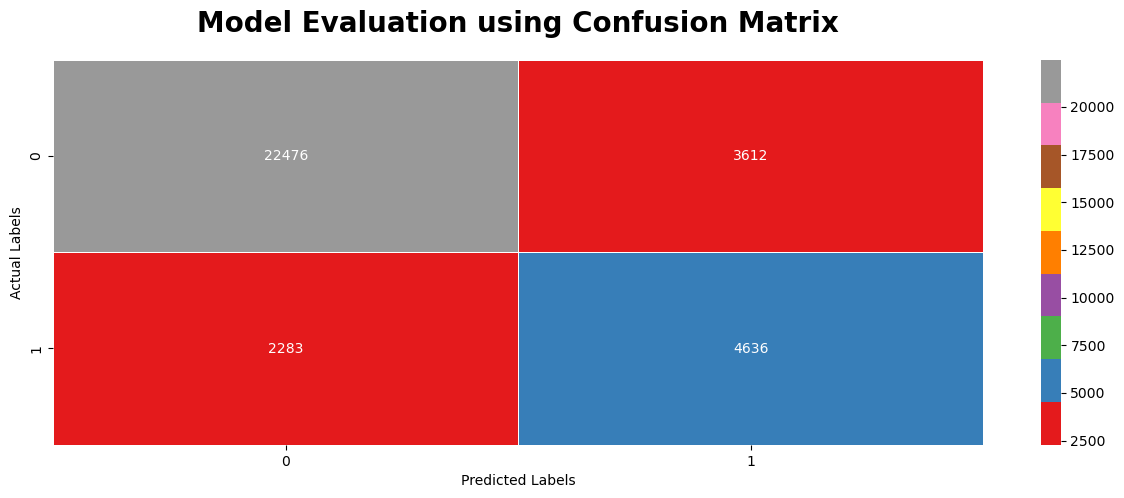

In [30]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,5))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

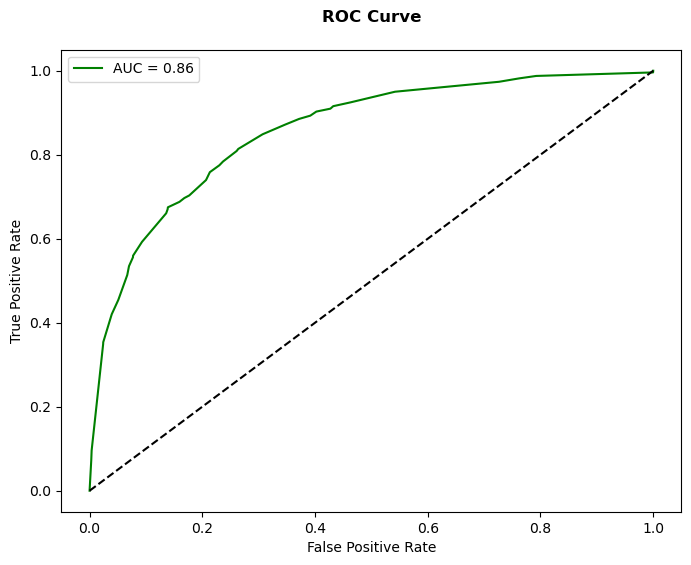

In [31]:
y_pred_proba = dtree.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

## 3. Random Forest

In [32]:
X = df_train.drop(columns=['Exited'])
y = df_train['Exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.8622110461417275


In [33]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     26052
           1       0.74      0.54      0.62      6955

    accuracy                           0.86     33007
   macro avg       0.81      0.74      0.77     33007
weighted avg       0.85      0.86      0.85     33007



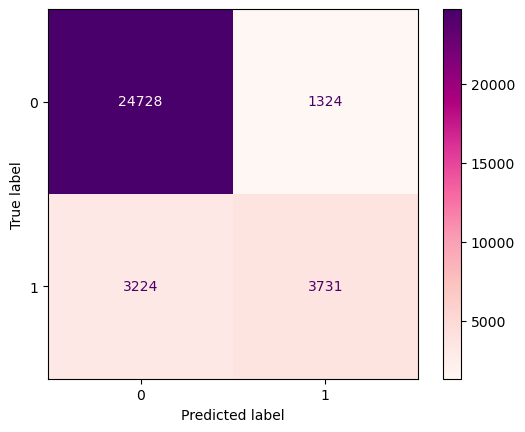

In [34]:
cm_nodelta = confusion_matrix(y_val, y_pred)
disp_nodelta = ConfusionMatrixDisplay(confusion_matrix=cm_nodelta)
disp_nodelta.plot(cmap="RdPu")

## 4. LightGBM

In [35]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

model_lgb = lgb.LGBMClassifier(random_state=42)

model_lgb.fit(X_train, y_train)

y_pred_lgb = model_lgb.predict(X_test)
y_proba_lgb = model_lgb.predict_proba(X_test)[:, 1]

print("🔍 LightGBM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))
print("AUC:", roc_auc_score(y_test, y_proba_lgb))

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1368
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
🔍 LightGBM Model Evaluation:
Accuracy: 0.6973369285303117
F1 Score: 0.18007222586999344
AUC: 0.4980378234646593


## 5. Neural Network

In [37]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Ölçekleme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Modeli oluştur
model_nn = Sequential()
model_nn.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dense(16, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

# Derle
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Eğit
model_nn.fit(X_train_scaled, y_train, epochs=20, batch_size=64, verbose=1)

# Tahmin yap ve değerlendirme
y_pred_nn = (model_nn.predict(X_test_scaled) > 0.5).astype("int32")

# Sonuçları yazdır
from sklearn.metrics import classification_report, roc_auc_score

print("🔍 Neural Network Model Evaluation:")
print(classification_report(y_test, y_pred_nn))
print("AUC:", roc_auc_score(y_test, y_pred_nn))


C:\Users\volkancamli\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8185 - loss: 0.4080
Epoch 2/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8615 - loss: 0.3314
Epoch 3/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8635 - loss: 0.3252
Epoch 4/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8630 - loss: 0.3258
Epoch 5/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8645 - loss: 0.3229
Epoch 6/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8624 - loss: 0.3247
Epoch 7/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8643 - loss: 0.3233
Epoch 8/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8666 - loss: 0.3202
Epoch 9/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8661 - loss: 0.3234
Epoch 10/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8646 - loss: 0.3217
Epoch 11/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8652 - loss: 0.3223
Epoch 12/20
2063/2063 ━━━━━━━━

# Export for Dashboard

In [277]:
import os

os.makedirs("dashboard_data2", exist_ok=True)

df_train.to_csv("dashboard_data2/df_train.csv", index=False)
df_test.to_csv("dashboard_data2/df_test.csv", index=False)

import pandas as pd

y_actual = df_actual_predicted["y_actual"].values

df_pred_results = pd.DataFrame({
    "y_actual": y_actual,
    "y_pred_proba": y_pred_proba,
    "y_pred": y_pred
})

df_pred_results.to_csv("dashboard_data2/y_pred_proba.csv", index=False)


balance_data.to_csv("dashboard_data2/balance_data.csv", index=False)
products_data.to_csv("dashboard_data2/products_data.csv", index=False)
card_data.to_csv("dashboard_data2/card_data.csv", index=False)
age_data.to_csv("dashboard_data2/age_data.csv", index=False)
tenure_data.to_csv("dashboard_data2/tenure_data.csv", index=False)
active_data.to_csv("dashboard_data2/active_data.csv", index=False)


In [294]:
import os
import pandas as pd
import numpy as np  

os.makedirs("dashboard_data3", exist_ok=True)

y_test.to_csv("dashboard_data3/y_test.csv", index=False)

y_pred_series = pd.Series(y_test_pred)
y_pred_series.to_csv("dashboard_data3/y_test_pred.csv", index=False)

In [301]:
importances = model.feature_importances_
feature_names = X_train.columns

df_importance = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

df_importance.to_csv("dashboard_data2/feature_importance.csv", index=False)


In [302]:
df_pred_results = pd.DataFrame({
    "y_actual": y_actual,
    "y_pred": y_pred,
    "y_pred_proba": y_pred_proba.flatten()  
})

df_pred_results_full = pd.concat([df_test.reset_index(drop=True), df_pred_results], axis=1)

df_pred_results_full.to_csv("dashboard_data2/y_pred_results_full.csv", index=False)
